In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math 

In [38]:
btc_hist_data = pd.read_excel("1\\Bitcoin Historical Data.xlsx").replace([',','%'],'')
btc_hist_data = btc_hist_data.iloc[::-1]

Date = btc_hist_data["Date"]
btc_close_price = btc_hist_data['Price']
btc_close_price = btc_close_price.to_numpy()
log_close_price =np.zeros(len(btc_close_price))
for i in range(len(btc_close_price)):
    log_close_price[i] = math.log10(btc_close_price[i])

btc_chg_price = btc_hist_data["Change %"]  * 100
btc_chg_price = btc_chg_price.to_numpy()

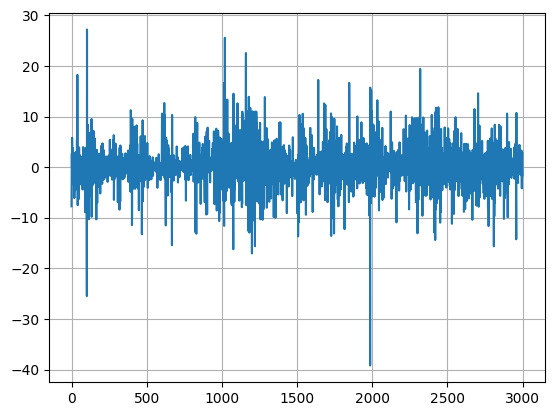

In [39]:
fig =plt.figure(5)
plt.plot(btc_chg_price[1000:4000])
plt.grid()
plt.show()

 RSI = 100 – [100 ÷ ( 1 + (Average Gain During Up Periods ÷ Average Loss During Down Periods ))]

In [59]:
gain = 0
loss = 0 
count_up = 0
count_down = 0

g = np.zeros(len(btc_chg_price))
l = np.zeros(len(btc_chg_price))
rs = np.zeros(len(btc_chg_price))

for i in reversed(range(14,len(btc_chg_price))):
    
    gain = 0
    loss = 0 
    count_up = 0
    count_down = 0
    
    for j in range(0,14):
        
        if btc_chg_price[i-j] >= 0.0:
            gain = gain + btc_chg_price[i-j]
            count_up = count_up + 1

        elif btc_chg_price[i-j] < 0.0:
            loss = loss + btc_chg_price[i-j] * -1
            count_down = count_down + 1
    
    if(count_down == 0 or count_up == 0):
        count_down = 1
        count_up = 1

    gain = gain / count_up
    loss = loss / count_down
    l[i] = loss  
    g[i] = gain
    rs[i] = gain / loss


C:\Users\Ali Tavoosi\AppData\Local\Temp\ipykernel_6124\4111733163.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  rs[i] = gain / loss


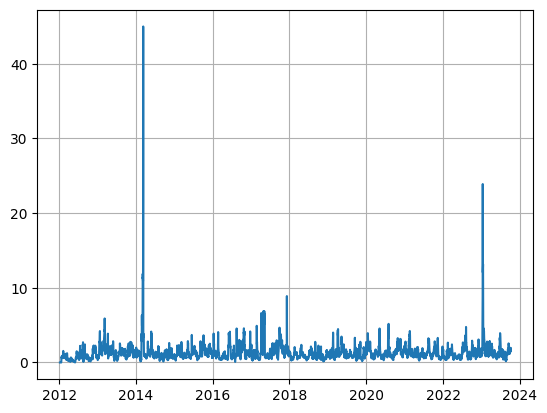

In [60]:
fig =plt.figure(3)
plt.plot(Date,rs)
plt.grid()
plt.show()

In [53]:

rsi = np.zeros(len(btc_chg_price))

for i in reversed(range(14,len(btc_chg_price))):
    rsi[i] = 100 - (100 / ( 1 + rs[i]))


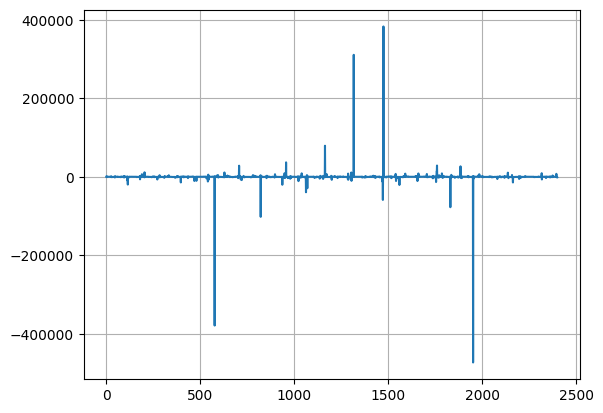

In [55]:
fig =plt.figure(4)
plt.plot(rsi[1600:4000])

plt.grid()
plt.show()